<a href="https://colab.research.google.com/github/lblogan14/opencv3_with_python/blob/master/ch1_geometric_trans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My' 'Drive/Colab' 'Notebooks/OpenCV3_with_Python_by_Example/data/ch1/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/OpenCV3_with_Python_by_Example/data/ch1


#Install OpenCV-Python

In [11]:
!pip3 install opencv-python

In [0]:
import numpy as np
import cv2

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

#Read, display, and save images

In [0]:
img = cv2.imread('input.jpg')
# cannot display the image object created by cv2 using cv2.imshow, need to 
# convert to RBG mode and use matplotlib.pyplot.imshow 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

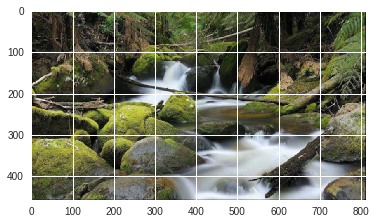

In [5]:
plt.imshow(img)

#Load and save in image
Load a color image in grayscale and save it

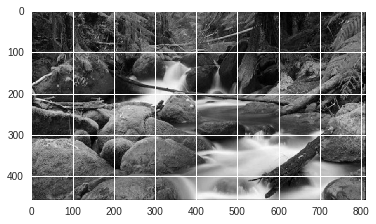

In [8]:
gray_img = cv2.imread('input.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_img, cmap='gray')

The ImreadFlag, `cv2.IMREAD_GRAYSCALE` is used to load the image in grayscale mode.

To save this image,

In [0]:
cv2.imwrite('images/output.jpg', gray_img)

##Change image format
To save and change the original image format to PNG,

In [0]:
img = cv2.imread('input.jpg')
cv2.imwrite('images/output.png', img, [cv2.IMWRITE_PNG_COMPRESSION])

This will save the original image as an output file named `output.png` using PNG compression with the help of *ImwriteFlag* and `cv2.IMWRITE_PNG_COMPRESSION`.

#Image color spaces
* **RBG**: Red, Green, Blue. Every pixel value is represented as a tuple of three numbers
corresponding to red, green, and blue. Each value ranges between 0 and 255
* **YUV**: Y refers to the luminance or intensity, U/V channels represent color information.
* **HSV**: Hue, Satruation, Value. 

##Convert color spaces
To see a list of all available flas of color spaces,

In [10]:
print([x for x in dir(cv2) if x.startswith('COLOR_')])

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

For example, to convert a colro image to a grayscale image,

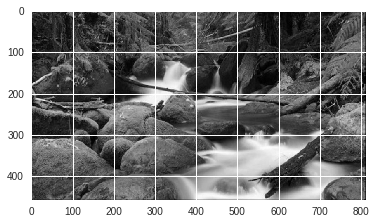

In [11]:
img = cv2.imread('input.jpg', cv2.IMREAD_COLOR)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')

##Split image channels
To convert color space to YUV,

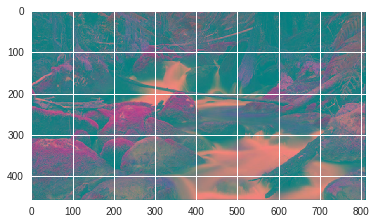

In [12]:
yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
plt.imshow(yuv_img)

It may look werid at first... Separate each channel to see the details,

Text(0.5,1,'V Channel')

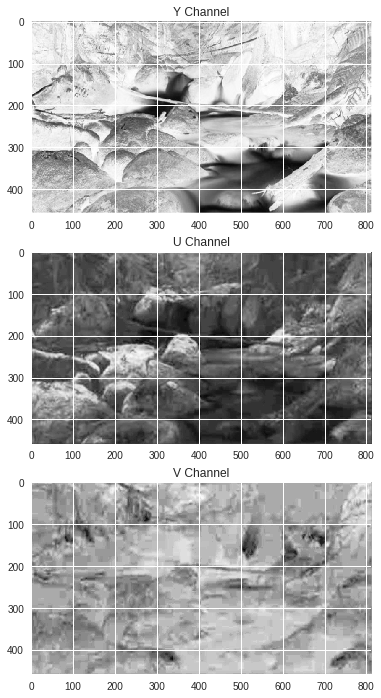

In [24]:
# alternative 1
y,u,v = cv2.split(yuv_img)
plt.figure(figsize=(15,12))
plt.subplot(311)
plt.imshow(y)
plt.title('Y Channel')
plt.subplot(312)
plt.imshow(u)
plt.title('U Channel')
plt.subplot(313)
plt.imshow(v)
plt.title('V Channel')


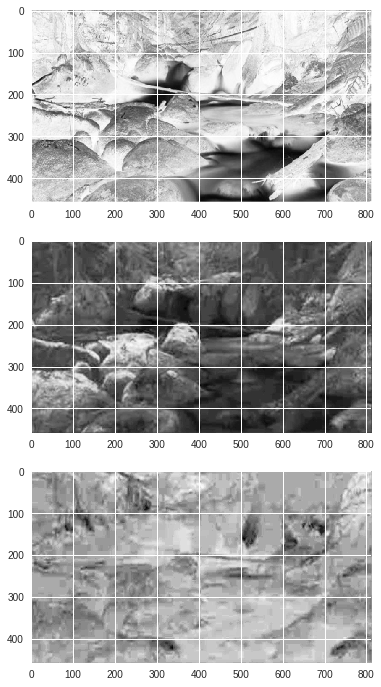

In [30]:
# alternative 2 (faster)
plt.figure(figsize=(15,12))
plt.subplot(311)
plt.imshow(yuv_img[:,:,0], label='Y Channel')
plt.subplot(312)
plt.imshow(yuv_img[:,:,1], label='U Channel')
plt.subplot(313)
plt.imshow(yuv_img[:,:,2], label='V Channel')

`yuv_img` is a NumPy array, so we can separate out the three channels by slicing it.

In [31]:
yuv_img.shape

(458, 812, 3)

##Merge image channels
read an image, split it into separate channels, and merge them to see how different effects can be obtained out of different combinations,

Text(0.5,1,'RBR Image')

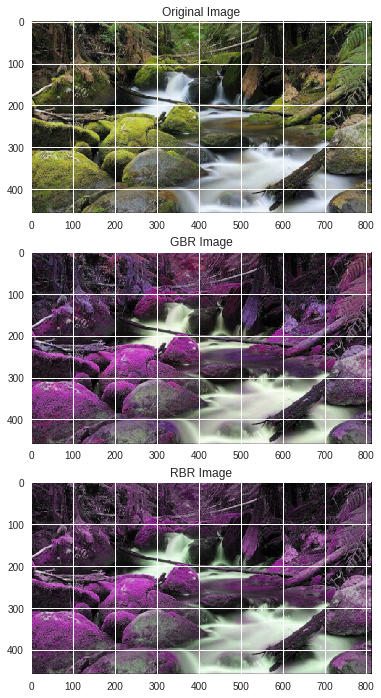

In [5]:
img = cv2.imread('input.jpg', cv2.IMREAD_COLOR)
b,g,r = cv2.split(img)
gbr_img = cv2.merge((g,b,r))
rbr_img = cv2.merge((r,b,r))
rgb_img = cv2.merge((r,g,b))

plt.figure(figsize=(15,12))
plt.subplot(311)
plt.imshow(rgb_img)
plt.title('Original Image')
plt.subplot(312)
plt.imshow(gbr_img)
plt.title('GBR Image')
plt.subplot(313)
plt.imshow(rbr_img)
plt.title('RBR Image')

#Image translation
shifts an image

Text(0.5,1,'Translation')

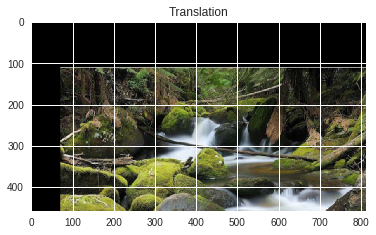

In [6]:
img = rgb_img
num_rows, num_cols = img.shape[:2]
translation_matrix = np.float32([ [1,0,70], [0,1,110]])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows), cv2.INTER_LINEAR)
plt.imshow(img_translation)
plt.title('Translation')

Translation means to shift the image by adding/substracting the *x* and *y* coordinates. To do this, need to create a transformation matrix defined as follows,
$$T = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1& t_y \end{bmatrix}$$
The $t_x$ and $t_y$ values are the *x* and *y* translation values. The image will be moved by *x* units to the right and by *y* units downwards. Then we use the `warpAffine` function to translate the image. The third argument in `warpAffine` refers to the number of rows and columns in the resulting image. It passes `InterpolaitonFlags` which defines combination of interpolation methods. In this case, it is `INTER_LINEAR` method.

Snce the number of rows and columns is the same as the original image, the resultant
image is going to get cropped. The reason for this is that the display space is not enough in the
output when we applied the translation matrix. To avoid cropping,

Text(0.5,1,'Translation without chopping')

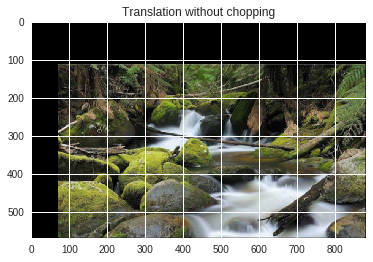

In [43]:
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols+70, num_rows+110))
plt.imshow(img_translation)
plt.title('Translation without chopping')

To move the image to the middle of a bigger image frame,

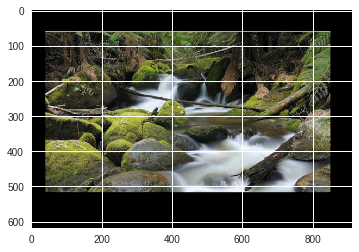

In [44]:
translation_matrix = np.float32([[1,0,70], [0,1,110]])
img_translation = cv2.warpAffine(img, 
                                 translation_matrix, 
                                 (num_cols+70, num_rows+110)
                                )
translation_matrix = np.float32([[1,0,-30], [0,1,-50]])
img_translation = cv2.warpAffine(img_translation, 
                                 translation_matrix, 
                                 (num_cols+70+30, num_rows+110+50))
plt.imshow(img_translation)

`borderMode` and `borderValue` allow you to fill up the empty borders of the translation with a pixel extrapolation method,

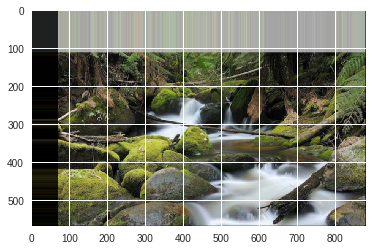

In [45]:
translation_matrix = np.float32([[1,0,70], [0,1,110]])
img_translation = cv2.warpAffine(img, 
                                 translation_matrix, 
                                 (num_cols+70, num_rows+110),
                                 cv2.INTER_LINEAR,
                                 cv2.BORDER_WRAP, # <- borderMode
                                 1) # <- borderValue
plt.imshow(img_translation)

Image rotation

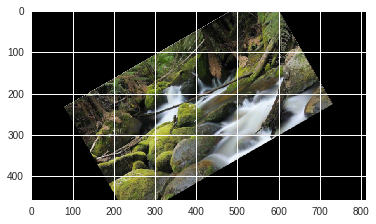

In [47]:
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2),
                                          30,
                                          0.7)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
plt.imshow(img_rotation)

`getRotationMatrix2D` specify the center point around which the image would be rotated as the first argument, then the angl of rotation in degrees, and a scaling factor for the image at the end. `30` as the second argument is to rotated the image by 30 degrees and `0.7` is to shrink the image by 30%

In [48]:
rotation_matrix

array([[  0.60621778,   0.35      ,  79.72558024],
       [ -0.35      ,   0.60621778, 232.27612777]])

The image content after rotation goes out of bounds and gets
cropped. To avoid this,

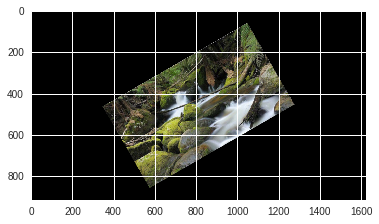

In [54]:
translation_matrix = np.float32([[1,0,int(0.5*num_cols)], 
                                 [0,1,int(0.5*num_rows)]
                                ])
rotation_matrix = cv2.getRotationMatrix2D((num_cols, num_rows), 30, 1)

img_translation = cv2.warpAffine(img, 
                                 translation_matrix, 
                                 (2*num_cols, 2*num_rows))
img_rotation - cv2.warpAffine(img_translation, 
                              rotation_matrix,
                              (num_cols*2, num_rows*2))
plt.imshow(img_rotation)

#Image scaling
resizes an image.

Text(0.5,1,'Scaling - Linear interpolation')

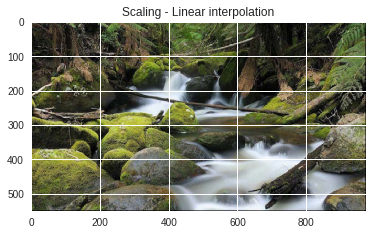

In [56]:
img_scaled = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
plt.imshow(img_scaled)
plt.title('Scaling - Linear interpolation')

Text(0.5,1,'Scaling - Cubic Interpolation')

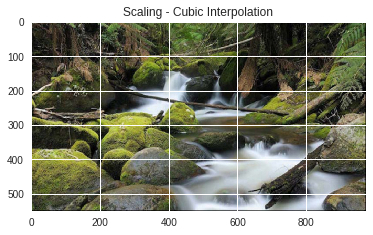

In [57]:
img_scaled = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
plt.imshow(img_scaled)
plt.title('Scaling - Cubic Interpolation')

The `fx` and `fy` are the scaling factors. In this case, the image will be enlarged by a factor of 1.2

Text(0.5,1,'Scaling - Skewed Size')

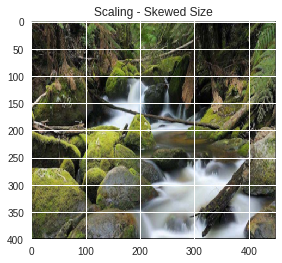

In [58]:
img_scaled = cv2.resize(img, (450, 400), interpolation=cv2.INTER_AREA)
plt.imshow(img_scaled)
plt.title('Scaling - Skewed Size')

If the `None` arg is replaced by a specific size, in this case, `(450, 400)`, the `resize` function will use that size to skew the image and resize it to that size.

#Affine transformations
**Euclidean transformations** are a type of geometric transformation that preserve length and
angle measures.
 If we take a geometric shape and apply Euclidean transformation to it, the
shape will remain unchanged. It might look rotated, shifted, and so on, but the basic
structure will not change.

**Affine transformations** are generalizations of Euclidean transformations.  Under the realm of affine transformations, lines will remain lines, but squares might become rectangles or parallelograms. Basically, affine
transformations don't preserve lengths and angles.

In order to build a general affine transformation matrix, we need to define the control
points. Once we have these control points, we need to decide where we want them to be
mapped.

 In this particular situation, all we need are three points in the source image, and
three points in the output image. If we want to convert an image into a parallelogram-like image,

Text(0.5,1,'Output')

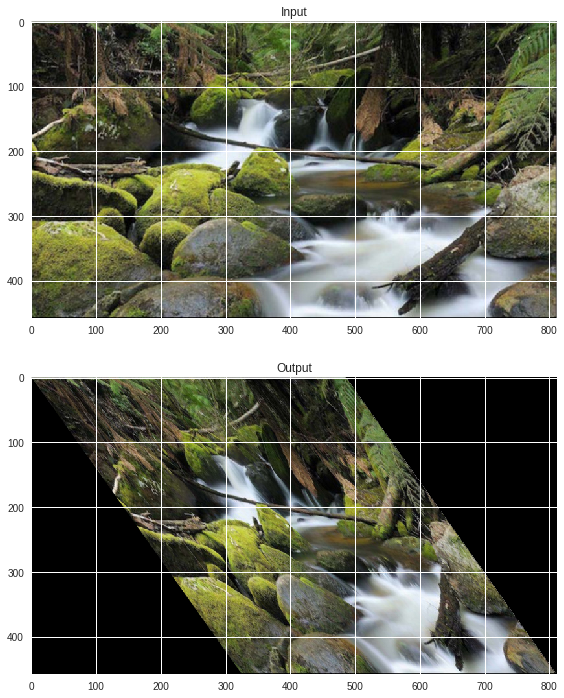

In [60]:
src_points = np.float32([[0,0], 
                         [num_cols-1,0], 
                         [0,num_rows-1]])
dst_points = np.float32([[0,0], 
                         [int(0.6*(num_cols-1)),0], 
                         [int(0.4*(num_cols-1)),num_rows-1]])

affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (num_cols, num_rows))
plt.figure(figsize=(15,12))
plt.subplot(211)
plt.imshow(img)
plt.title('Input')
plt.subplot(212)
plt.imshow(img_output)
plt.title('Output')

The three points in `src_points` are mapped to the corresponding points in `dst_points`.
![alt text](https://github.com/lblogan14/opencv3_with_python/blob/master/images/affine1.JPG?raw=true)

To get the mirror image of the input image, need to change the control points

In [0]:
src_points = np.float32([[0,0],
                         [num_cols-1,0],
                         [0, num_rows-1]
                        ])
dst_points = np.float32([[num_cols-1,0],
                         [0,0],
                         [num_cols-1, num_rows-1]
                        ])

The mapping:

![alt text](https://github.com/lblogan14/opencv3_with_python/blob/master/images/affine2.JPG?raw=true)

Text(0.5,1,'Output')

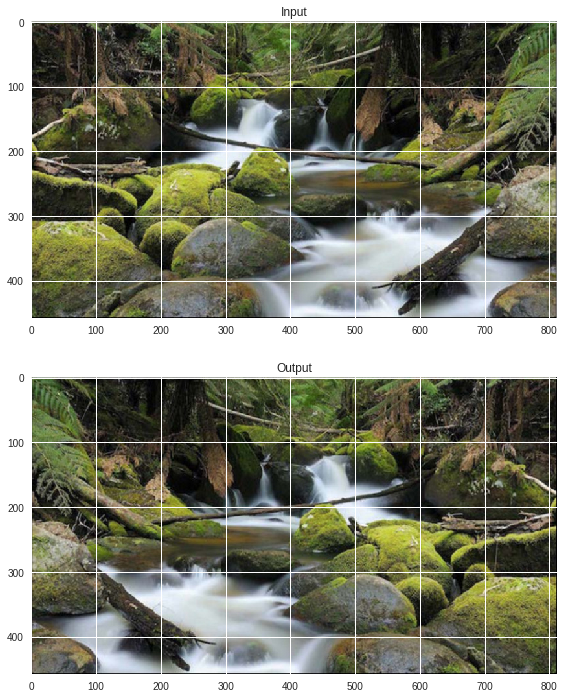

In [64]:
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (num_cols, num_rows))
plt.figure(figsize=(15,12))
plt.subplot(211)
plt.imshow(img)
plt.title('Input')
plt.subplot(212)
plt.imshow(img_output)
plt.title('Output')

#Projective transformations
Any two images on a given plane are related by a homography. Once the camera rotation and translation have been extracted from an estimated
homography matrix, this information may be used for navigation, or to insert models of 3D
objects into an image or video

Text(0.5,1,'Output')

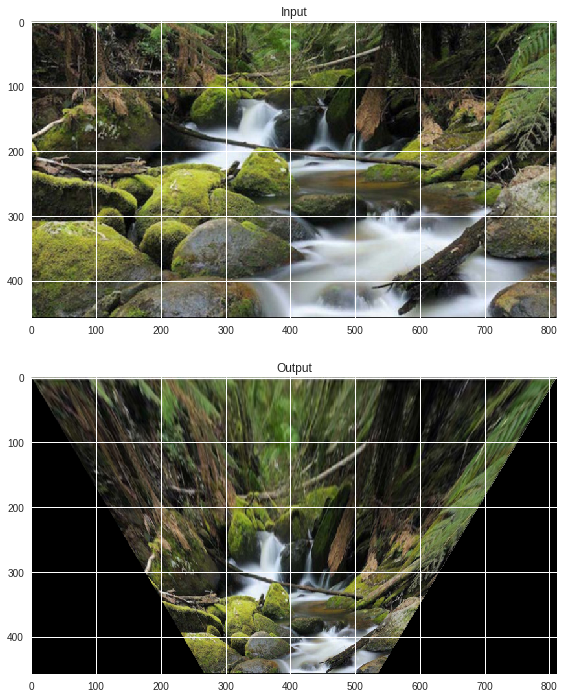

In [9]:
src_points = np.float32([[0,0], 
                         [num_cols-1,0], 
                         [0,num_rows-1], 
                         [num_cols-1,num_rows-1]])
dst_points = np.float32([[0,0], [num_cols-1,0], 
                         [int(0.33*num_cols),num_rows-1],
                         [int(0.66*num_cols),num_rows-1]])

projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (num_cols, num_rows))
plt.figure(figsize=(15,12))
plt.subplot(211)
plt.imshow(img)
plt.title('Input')
plt.subplot(212)
plt.imshow(img_output)
plt.title('Output')

Choose four control points in the source image and map them to the destination
image. Parallel lines will not remain parallel lines after the transformation. The `getPerspectiveTransform()` function is used to get the transformation matrix.

Text(0.5,1,'Output')

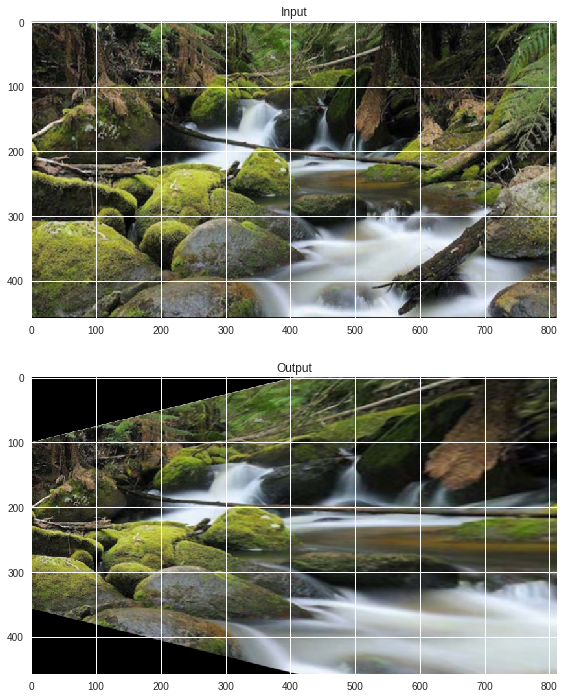

In [10]:
src_points = np.float32([[0,0], 
                         [0,num_rows-1], 
                         [num_cols/2,0],
                         [num_cols/2,num_rows-1]])
dst_points = np.float32([[0,100], 
                         [0,num_rows-101],
                         [num_cols/2,0],
                         [num_cols/2,num_rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (num_cols, num_rows))
plt.figure(figsize=(15,12))
plt.subplot(211)
plt.imshow(img)
plt.title('Input')
plt.subplot(212)
plt.imshow(img_output)
plt.title('Output')

#Image warping
Create a custom mapping

In [11]:
img.shape

(458, 812, 3)

In [0]:
img = cv2.imread('input.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

Text(0.5,1,'Output')

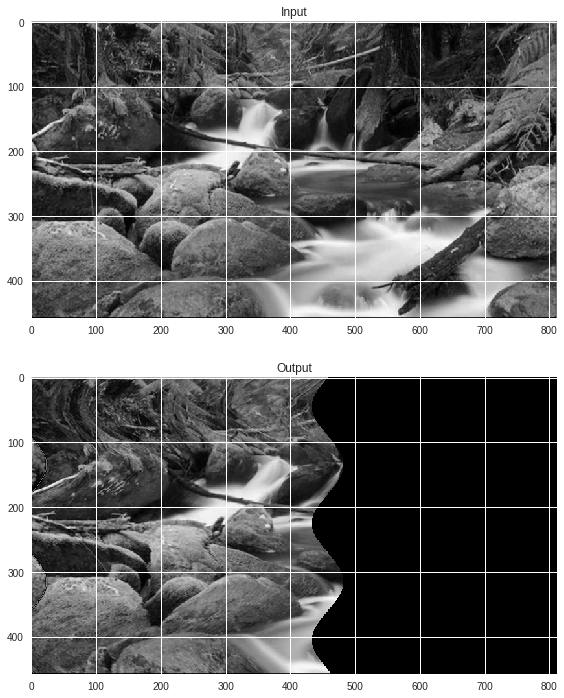

In [15]:
# vertical wave
img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
  for j in range(cols):
    offset_x = int(25.0 * np.sin(2*3.14*i/180))
    offset_y = 0
    if j+offset_x < rows:
      img_output[i,j] = img[i,(j+offset_x)%cols]
    else:
      img_output[i,j] = 0
      
plt.figure(figsize=(15,12))
plt.subplot(211)
plt.imshow(img, cmap='gray')
plt.title('Input')
plt.subplot(212)
plt.imshow(img_output, cmap='gray')
plt.title('Output')

Text(0.5,1,'Output')

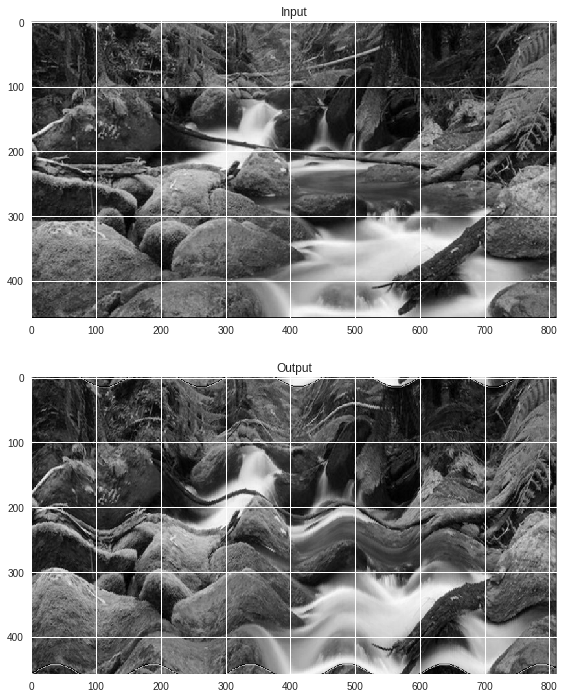

In [21]:
# horizontal wave
img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
  for j in range(cols):
    offset_x = 0
    offset_y = int(16.0*np.sin(2*3.14*j/150))
    if i+offset_y < cols:
      img_output[i,j] = img[(i+offset_y)%rows, j]
    else:
      img_output[i,j] = 0
      
plt.figure(figsize=(15,12))
plt.subplot(211)
plt.imshow(img, cmap='gray')
plt.title('Input')
plt.subplot(212)
plt.imshow(img_output, cmap='gray')
plt.title('Output')

Text(0.5,1,'Output')

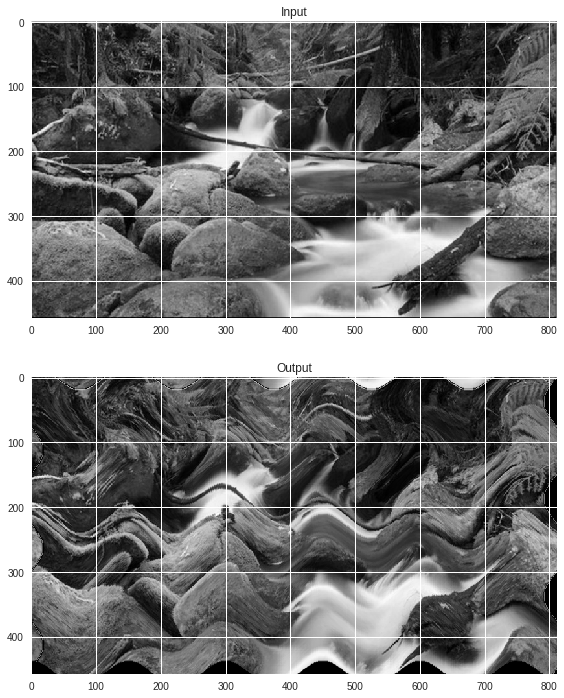

In [23]:
# both horizontal and vertical waves
img_output = np.zeros(img.shape, dtype=img.dtype) 
 
for i in range(rows): 
    for j in range(cols): 
        offset_x = int(20.0 * np.sin(2 * 3.14 * i / 150)) 
        offset_y = int(20.0 * np.cos(2 * 3.14 * j / 150)) 
        if i+offset_y < rows and j+offset_x < cols: 
            img_output[i,j] = img[(i+offset_y)%rows,(j+offset_x)%cols] 
        else: 
            img_output[i,j] = 0 
            
plt.figure(figsize=(15,12))
plt.subplot(211)
plt.imshow(img, cmap='gray')
plt.title('Input')
plt.subplot(212)
plt.imshow(img_output, cmap='gray')
plt.title('Output')

Text(0.5,1,'Output')

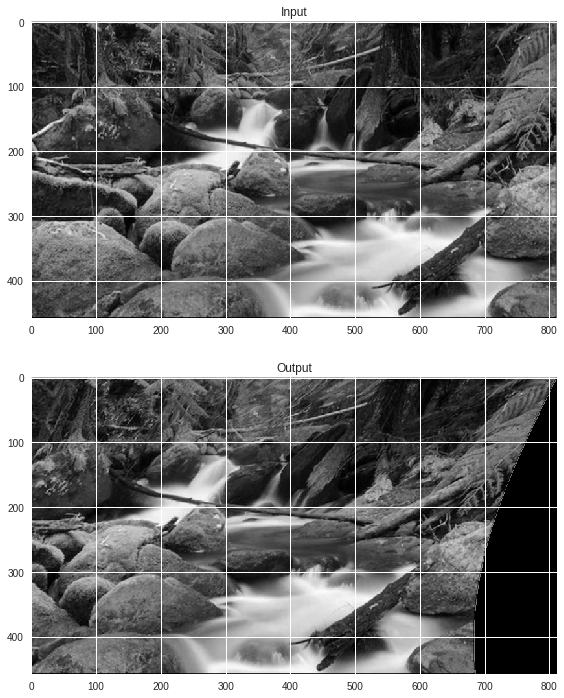

In [24]:
# concave effect
img_output = np.zeros(img.shape, dtype=img.dtype) 
 
for i in range(rows): 
    for j in range(cols): 
        offset_x = int(128.0 * np.sin(2 * 3.14 * i / (2*cols))) 
        offset_y = 0 
        if j+offset_x < cols: 
            img_output[i,j] = img[i,(j+offset_x)%cols] 
        else: 
            img_output[i,j] = 0 
            
plt.figure(figsize=(15,12))
plt.subplot(211)
plt.imshow(img, cmap='gray')
plt.title('Input')
plt.subplot(212)
plt.imshow(img_output, cmap='gray')
plt.title('Output')